In [1]:
# importing  clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
crime_df = pd.read_csv("/Users/halders/Documents/Excelr/dataset/crime_data.csv")
crime_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
crime_df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [5]:
scaler = StandardScaler()
scaled_crime_df = scaler.fit_transform (crime_df[['Murder', 'Assault', 'UrbanPop', 'Rape']])

### Heirarchical Clustering 

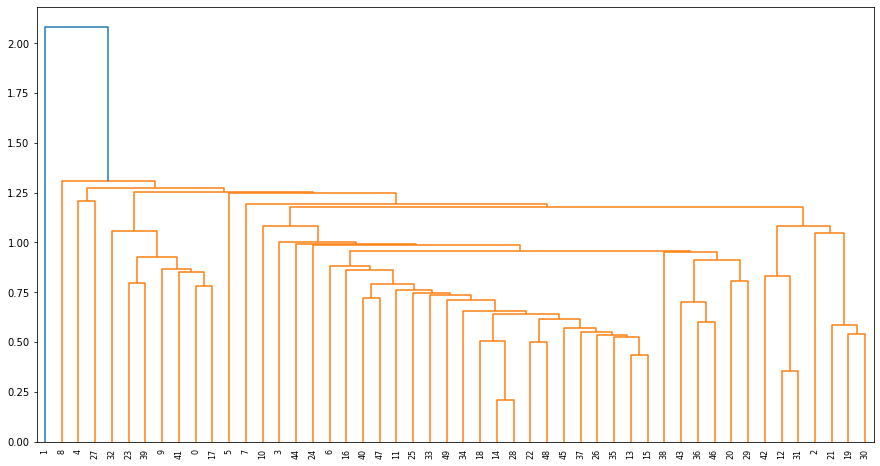

In [24]:
# create dendrogram
plt.figure(figsize=(15,8))
dendogram = sch.dendrogram(sch.linkage(scaled_crime_df, method='single'))

In [7]:
# Creating clusters and associating with the actual dataframe.
h_clusters = AgglomerativeClustering(3)
h_clusters.fit(scaled_crime_df)
crime_df["H_Cluster_Id"]= h_clusters.labels_

In [8]:
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Cluster_Id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [9]:
crime_df.groupby("H_Cluster_Id").mean()

,Murder,Assault,UrbanPop,Rape
H_Cluster_Id,,,,
0,12.331579,259.315789,68.315789,29.215789
1,6.210526,142.052632,71.263158,19.184211
2,3.091667,76.000000,52.083333,11.833333


#### Inference:
We can say that the states with cluster id 0 has maximum crime rate and states with cluster id 1 has medium crime rate and states with cluster id 2 have the least crime rate.

### Filtering states with clusters

In [10]:
#states with most crime
crime_df[crime_df.H_Cluster_Id==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Cluster_Id
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
12,Illinois,10.4,249,83,24.0,0
17,Louisiana,15.4,249,66,22.2,0
19,Maryland,11.3,300,67,27.8,0


In [11]:
#states with medium crime
crime_df[crime_df.H_Cluster_Id==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Cluster_Id
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
10,Hawaii,5.3,46,83,20.2,1
13,Indiana,7.2,113,65,21.0,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1
20,Massachusetts,4.4,149,85,16.3,1
24,Missouri,9.0,178,70,28.2,1
29,New Jersey,7.4,159,89,18.8,1


In [12]:
#States with lowest crime rate
crime_df[crime_df.H_Cluster_Id==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Cluster_Id
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2


## Using K Means

In [13]:
crime_k = pd.read_csv("/Users/halders/Documents/Excelr/dataset/crime_data.csv")
crime_k.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [14]:
#normalizing function
scaler = StandardScaler()
scaled_crime_k = scaler.fit_transform (crime_k[['Murder', 'Assault', 'UrbanPop', 'Rape']])

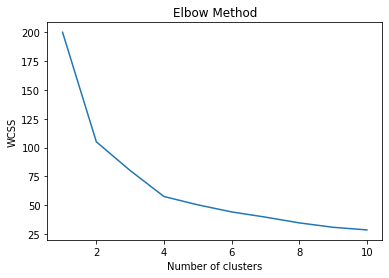

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_crime_k)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### According to the Elbow daigram we can see that the optimum clusters for this dataset is 2 as the curve breaks from 2.


In [16]:
#Build Cluster algorithm
k = 2
clusters_k = KMeans(k)
clusters_k.fit(scaled_crime_k)
crime_df["K_Clusters"]=clusters_k.labels_

In [17]:
#filtering crime_k dataframe with clusters, high crime rate
crime_df[crime_df.K_Clusters==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Cluster_Id,K_Clusters
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,0,0
2,Arizona,8.1,294,80,31.0,0,0
4,California,9.0,276,91,40.6,0,0
5,Colorado,7.9,204,78,38.7,0,0
8,Florida,15.4,335,80,31.9,0,0
9,Georgia,17.4,211,60,25.8,0,0
12,Illinois,10.4,249,83,24.0,0,0
17,Louisiana,15.4,249,66,22.2,0,0
19,Maryland,11.3,300,67,27.8,0,0


In [18]:
#filtering crime_k dataframe with clusters, low crime rate
crime_df[crime_df.K_Clusters==1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Cluster_Id,K_Clusters
3,Arkansas,8.8,190,50,19.5,1,1
6,Connecticut,3.3,110,77,11.1,1,1
7,Delaware,5.9,238,72,15.8,1,1
10,Hawaii,5.3,46,83,20.2,1,1
11,Idaho,2.6,120,54,14.2,2,1
13,Indiana,7.2,113,65,21.0,1,1
14,Iowa,2.2,56,57,11.3,2,1
15,Kansas,6.0,115,66,18.0,1,1
16,Kentucky,9.7,109,52,16.3,1,1
18,Maine,2.1,83,51,7.8,2,1


#### For K Means clustering we have 2 clusters which was determined by the elbow daigram and the first cluster has high crime rate and the states in the second cluster, have low crime rate.

## DBScan Clustering

In [19]:
crime_db = pd.read_csv("/Users/halders/Documents/Excelr/dataset/crime_data.csv")
crime_db.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [20]:
#normalizing function
scaler = StandardScaler()
scaled_crime_db = scaler.fit_transform (crime_db[['Murder', 'Assault', 'UrbanPop', 'Rape']])

In [21]:
#fitting the dbscan model to get clusters
db_clusters = DBSCAN(eps=1.2, min_samples=4)
db_clusters.fit(scaled_crime_db)
crime_df["DB_Clusters"] = db_clusters.labels_

In [22]:
crime_df.groupby("DB_Clusters").mean()

,Murder,Assault,UrbanPop,Rape,H_Cluster_Id,K_Clusters
DB_Clusters,,,,,,
-1,10.900000,266.000000,75.600000,40.340000,0.000000,0.000000
0,14.671429,251.285714,54.285714,21.685714,0.000000,0.000000
1,6.110526,143.394737,66.289474,18.634211,1.131579,0.789474


In [23]:
# Final Dataframe with all three Clustering methods results together - 
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,H_Cluster_Id,K_Clusters,DB_Clusters
0,Alabama,13.2,236,58,21.2,0,0,0
1,Alaska,10.0,263,48,44.5,0,0,-1
2,Arizona,8.1,294,80,31.0,0,0,1
3,Arkansas,8.8,190,50,19.5,1,1,1
4,California,9.0,276,91,40.6,0,0,-1
5,Colorado,7.9,204,78,38.7,0,0,-1
6,Connecticut,3.3,110,77,11.1,1,1,1
7,Delaware,5.9,238,72,15.8,1,1,1
8,Florida,15.4,335,80,31.9,0,0,-1
9,Georgia,17.4,211,60,25.8,0,0,0
